# Geoprocessing Tutorial

I've developed this tutorial to help out people get a first contact with geoprocessing. There are two types of data we can handle with geoprocessing, one is a raster dataset and the other is a vector dataset. To handle raster data, we need to use the [rasterio](https://rasterio.readthedocs.io) library. To handle vector data, we need to use the [geopandas](https://geopandas.org) library.

# Table of Contents

1. [Introduction](#introduction)
2. [Getting Started](#getting-started)
3. [Geoprocessing with Python](#geoprocessing-with-python)
4. [Last Notes](#last-notes)

# Introduction

Before running this tutorial, I highly recommend you have a basic understanding of Python and the basics of geoprocessing. I'll be using geopandas to do the geoprocessing, but you can use any library that supports geoprocessing. I'll be using the [Portugal's Portal de dados abertos da Administração Pública](https://dados.gov.pt/) and [Plataforma de dados abertos georreferenciados da Câmara Municipal de Lisboa](https://geodados-cml.hub.arcgis.com/) as the source of data for this tutorial.

# Getting Started

To get started, we need to differentiate between two data types. One is a vector and another a raster. The vector data is a collection of points, lines, polygons, etc. The raster data is a collection of pixels. To work with raster data, we need to use the rasterio library. To work with vector data, we need to use the geopandas library. Examples of both data types are shown below.

In [1]:
# Import the required libraries
import pandas as pd
import geopandas as gpd

/home/dabin/Documents/GitHub/Geoprocessing-Tutorial/venv/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Reading From a Shapefile

Geopandas allows reading shapefile and geojson files direcly into a geopandas dataframe. But there is also the possibility to create geopandas dataframes from scratch in a similar way to pandas dataframes. We will open a shapelfile and some geojson files.

In [2]:
# Parishes in Portugal
parishes_url = "https://dados.gov.pt/en/datasets/r/5474087d-7a14-4368-a9b8-3de751dca65a" # Shapefile
parishes_gdf = gpd.read_file(parishes_url)
parishes_gdf.head()

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry
0,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.09,4117.69,Albufeira e Olhos de Água,"POLYGON ((-13243.458 -288011.973, -13244.464 -..."
1,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,3431.83,3436.91,Sagres,"POLYGON ((-67806.358 -291271.354, -67809.689 -..."
2,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15487.120 -287903.523, -15487.725 -..."
3,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15520.560 -287893.679, -15521.650 -..."
4,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15531.602 -287884.483, -15532.205 -..."


## Reading from a GeoJSON file

In [3]:
# Public Hospitals in Lisbon
hospitals_url = "https://opendata.arcgis.com/datasets/172678f193144512860a397fde991361_4.geojson" # GeoJSON
hospitals_gdf = gpd.read_file(hospitals_url)
hospitals_gdf.head()

,OBJECTID,COD_SIG,IDTIPO,INF_NOME,INF_MORADA,INF_TELEFONE,INF_FAX,INF_EMAIL,INF_SITE,INF_DESCRICAO,INF_FONTE,INF_MUNICIPAL,GlobalID,geometry
0,1,2400701054001,2,Hospital São José,Rua José António Serrano,+351 218 841 000,None,sec.ca@chlc.min-saude.pt,http://www.chlc.min-saude.pt,Centro Hospitalar Lisboa Central,http://www.portaldasaude.pt/portal/servicos/pr...,0,477e96e7-fa0c-4409-9f82-c40baf3c1817,POINT (-9.13745 38.71773)
1,2,5000607001001,2,Maternidade Dr. Alfredo da Costa,"Rua Pinheiro Chagas, 5-5A\nRua Latino Coelho, ...",+351 213 184 000,None,secretariadoca@mac.min-saude.pt,http://www.mac.min-saude.pt,"Centro Hospitalar de Lisboa Central, EPE.\nO D...",http://www.portaldasaude.pt/portal/servicos/pr...,0,6b503faf-5d94-4bbe-9519-badec46fc560,POINT (-9.14744 38.73262)
2,3,1401401124001,2,Hospital Santa Marta,"Rua de Santa Marta, 50-50 I\n",+351 213 594 000,None,administracao@hsmarta.min-saude.pt,http://www.hsmarta.min-saude.pt/,Centro Hospitalar Lisboa Central,http://www.portaldasaude.pt/portal/servicos/pr...,0,e2aa26c8-4494-45e7-b6f2-81d7dcce1b11,POINT (-9.14485 38.72379)
3,4,4200102060001,2,Hospital Júlio de Matos,"Avenida do Brasil, 53-53D (Pav 11)\n",+351 217 917 000,None,administracao@chpl.min-saude.pt,http://www.hjmatos.min-saude.pt/,Centro Hospitalar Psiquiátrico de Lisboa,www.min-saude.pt/portal/servicos/prestadoresV2...,0,139ff563-7490-46b7-bbcd-0e7cd99c7e56,POINT (-9.14614 38.75712)
4,5,2303302109001,2,Hospital Curry Cabral,"Rua da Beneficência, 8\n\n",+351 217 924 200,None,cadm@hccabral.min-saude.pt,http://www.chlc.min-saude.pt,"Centro Hospitalar de Lisboa Central, EPE.\nO D...",http://www.portaldasaude.pt/portal/servicos/pr...,0,3b054d50-d529-40f5-b13e-e60b161baf8a,POINT (-9.15205 38.74132)


## Converting from a CSV File

A very important thing when creating our own geopandas dataframes is to specify the right geometry and crs. Most of the times, we get latitude and longitude data, which we can easily convert to a Point geometry. With latitude and longitude, the crs is the WGS84 crs. But sometimes, we get data in a different crs. We should be careful to pay attention to the crs of our data.

In [4]:
# CTT Data in CSV and convert to GeoDataFrame
ctt_url = "https://github.com/cusco/ctt/raw/master/ctt-lat-lng-csv.zip" # ZIP with CSV
ctt_df = pd.read_csv(ctt_url, compression="zip", sep=";", encoding="latin-1", decimal=",")
# Since we don't have metadata about the geometry, we need to create a geometry column and specify the CRS
ctt_gdf = gpd.GeoDataFrame(ctt_df, geometry=gpd.points_from_xy(ctt_df.LONGITUDE, ctt_df.LATITUDE), crs=4326)
ctt_gdf.head()

,num,dd_desig,cc_desig,dd,cc,llll,LOCALIDADE,ART_COD,ART_TIPO,PRI_PREP,...,CP4,CP3,CPALF,LATITUDE,LONGITUDE,precision,scannedAddress,foundAddress,matched,geometry
0,1,Aveiro,Águeda ...,1,1,249,Alcafaz,NaN,NaN,NaN,...,3750,11,AGADÃO,40.575534,-8.323799,4,"alcafaz, agadÃo, aveiro,Portugal|2","Alcafaz, 3750 Agadão, Portugal",4,POINT (-8.32380 40.57553)
1,2,Aveiro,Águeda ...,1,1,250,Caselho,NaN,NaN,NaN,...,3750,12,AGADÃO,40.562869,-8.322199,4,"caselho, agadÃo, aveiro,Portugal|2","Caselho, 3750 Agadão, Portugal",4,POINT (-8.32220 40.56287)
2,3,Aveiro,Águeda ...,1,1,251,Corga da Serra,NaN,NaN,NaN,...,3750,13,AGADÃO,40.585534,-8.307438,4,"corga da serra, agadÃo, aveiro,Portugal|2","Corga da Serra, 3750 Agadão, Portugal",4,POINT (-8.30744 40.58553)
3,4,Aveiro,Águeda ...,1,1,252,Foz,NaN,NaN,NaN,...,3750,14,AGADÃO,40.549895,-8.322219,4,"foz, agadÃo, aveiro,Portugal|2","Foz, 3750 Agadão, Portugal",4,POINT (-8.32222 40.54989)
4,5,Aveiro,Águeda ...,1,1,253,Guistola,NaN,NaN,NaN,...,3750,15,AGADÃO,40.534092,-8.310815,4,"guistola, agadÃo, aveiro,Portugal|2","Guistola, 3750 Agadão, Portugal",4,POINT (-8.31081 40.53409)


## Converting Addresses to Latitude and Longitude and then to a GeoDataFrame

In [5]:
# Example of how geopy works
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoprocessing_tutorial")
location = geolocator.geocode("Rua de São João, Lisboa")
location.latitude, location.longitude

(38.7081831, -9.4246809)

In [6]:
schools_2017_2018 = "http://dados.cm-lisboa.pt/dataset/67077222-9864-4dcc-8e0e-638a5e9efed1/resource/ac2e2c79-9e10-4f9e-8d83-84537839da18/download/agrupamentos-de-escolastipologia20172018.xlsx"
schools_df = pd.read_excel(schools_2017_2018)
# Since we only have addresses, we can use GeoPy to get the coordinates and then create a GeoDataFrame
geolocator = Nominatim(user_agent="geoprocessing_tutorial")
schools_df[["Latitude", "Longitude"]] = schools_df.Morada.apply(lambda address: geolocator.geocode(f"{address}, Lisboa")).apply(lambda x: (x.latitude, x.longitude) if x is not None else (pd.NA, pd.NA)).to_list()
# Some addresses were not found, so we need to drop them.
schools_df.dropna(subset=["Latitude", "Longitude"], inplace=True)
schools_gdf = gpd.GeoDataFrame(schools_df, geometry=gpd.points_from_xy(schools_df.Longitude, schools_df.Latitude), crs=4326)

## Properties of a GeoDataFrame

There are two very important properties of geodataframes. The first is the geometry column. This column contains the geometry of each row. The second is the crs property. This property contains the coordinate reference system of the dataframe. The geometry is very similar to a column or Series in pandas, but with geometric data, therefore named [GeoSeries](https://geopandas.org/en/stable/docs/reference/geoseries.html). The objects within the geometry column are of type [shapely.geometry.base.BaseGeometry](https://shapely.readthedocs.io/en/stable/manual.html#geometry-types). We can visualize their shape by plotting them, or simply by printing them.

* By using the `plot()` method, we can visualize the geometry of the dataframe.
* The geometry column can be accessed by using the `geometry` property. It is a `GeoSeries` and doesn't necessarily have the name of "geometry".
* It is possible to have multiple `GeoSeries` in a `GeoDataFrame` but all geometric operations done on a `GeoDataFrame` are performed only on the geometry column.

<AxesSubplot:>

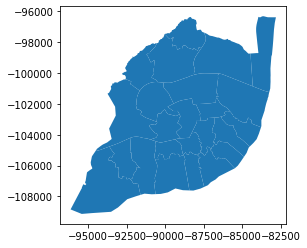

In [7]:
parishes_gdf[parishes_gdf.Concelho=="LISBOA"].plot()

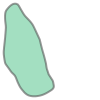

In [8]:
# Parishes have a Polygon type of geometry
parishes_gdf.geometry.iloc[0]

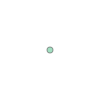

In [9]:
# Both hospital and ctt data have the same type of geometry (Point)
ctt_gdf.geometry.iloc[0]

In [149]:
# For interactive plotting, it is also possible to use Folium with the explore() method
parishes_gdf[parishes_gdf.Concelho=="LISBOA"].explore()

The CRS is a [proj4](https://proj4.org/operations/projections/) string that defines the coordinate reference system of the dataframe. It is very similar to the [crs](https://rasterio.readthedocs.io/en/latest/api/rasterio.crs.html) property of rasterio. The CRS is used to convert the coordinates of the geometry column to the desired coordinate reference system. The most common CRS is the [EPSG:4326](https://epsg.io/4326) which is the WGS84 coordinate reference system. The CRS can be accessed by using the `crs` property in a `GeoDataFrame`.

In [10]:
ctt_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

If we will work with multiple geodataframes, we will need to make sure that they have the same CRS. In the case we are working on a city level, we can use a Projected Coordinate System instead of the WGS84. The Projected Coordinate System we will use is the [EPSG:3763](https://epsg.io/3763) code.

In [11]:
# The crs is the one used in the parishes. We can set the crs of the hospitals to the same as the parishes.
hospitals_gdf = hospitals_gdf.to_crs(parishes_gdf.crs)
schools_gdf = schools_gdf.to_crs(parishes_gdf.crs)
hospitals_gdf.crs

<Derived Projected CRS: EPSG:3763>
Name: ETRS89 / Portugal TM06
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Portugal - mainland - onshore.
- bounds: (-9.56, 36.95, -6.19, 42.16)
Coordinate Operation:
- name: Portugual TM06
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

The points will now be represented by different values of coordinates. They also now in a cartesian coordinate system with metres as the unit of measure instead of degrees.

## Reading Raster Data

To read raster data, we need to use the rasterio library. Raster data is a collection of pixels. The pixels are represented by a grid of values. The values are represented by a [numpy array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html). Usually raster data is stored in a [GeoTIFF](https://en.wikipedia.org/wiki/Geographic_Information_Model) file. it is also possible to read raster data from a [GDAL](https://gdal.org/) file. 

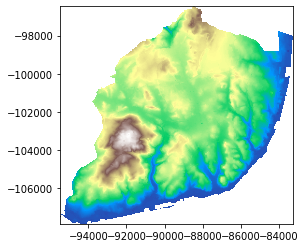

<AxesSubplot:>

In [74]:
import rasterio
from rasterio.plot import show

url = "zip+http://dados.cm-lisboa.pt/dataset/295c9c81-4c69-49d0-8f05-1acec772b875/resource/f4ff9d80-6bab-487d-9eb2-8a39ef814003/download/mdt.zip!mdt.tif"
lisbon_elevation = rasterio.open(url)
show(lisbon_elevation, cmap="terrain")

# Geoprocessing with Python

There are multiple processing methods that can be used to perform geoprocessing. I will provide a few examples, but there are many more. I will be using the [geopandas](https://geopandas.org/en/stable/index.html) library's available methods.

1. Union between different parishes
2. Summarize within Lisbon's parishes, the number of schools and public hospitals in the datasets
3. Get the elevation of the public hospitals
4. Get the minimum and maximum elevation in each Lisbon parish

## Union between different parishes

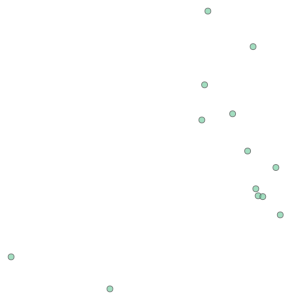

In [48]:
# We can join a whole GeoSeries into one object
hospitals_gdf.geometry.unary_union

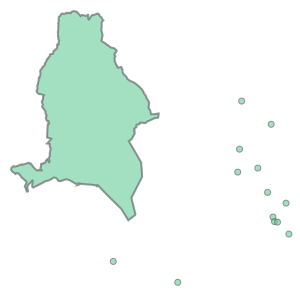

In [53]:
# We are dissolving all Polygon geometries into one Polygon (AMADORA) and doing Union with the Point geometries of the hospitals.
parishes_gdf[parishes_gdf.Concelho=="AMADORA"].dissolve().union(hospitals_gdf.geometry.unary_union).iloc[0]

## Summarize Within

In [33]:
# To get the a statistic of a geometry within another geometry, we can use a spatial join and then aggregate the values
gpd.sjoin(hospitals_gdf, parishes_gdf, how="inner", predicate="within")\
    .groupby("Freguesia", as_index=False)\
    .agg({"OBJECTID": "count"})\
    .rename(columns={"OBJECTID":"Hospitals"})\
    .style.background_gradient(cmap="Blues")

,Freguesia,Hospitals
0,Alcântara,1
1,Alvalade,2
2,Arroios,2
3,Avenidas Novas,2
4,Belém,1
5,Lumiar,1
6,Santo António,3
7,São Domingos de Benfica,1


In [35]:
# To get the a statistic of a geometry within another geometry, we can use a spatial join and then aggregate the values
gpd.sjoin(schools_gdf, parishes_gdf, how="inner", predicate="within")\
    .groupby("Freguesia", as_index=False)\
    .agg({"Morada": "count"})\
    .rename(columns={"Morada":"Schools"})\
    .style.background_gradient(cmap="Blues")

,Freguesia,Schools
0,Alcântara,2
1,Algueirão-Mem Martins,1
2,Alvalade,4
3,Areeiro,2
4,Arroios,4
5,Avenidas Novas,2
6,Beato,3
7,Belém,3
8,Benfica,5
9,Campo de Ourique,1


## Getting Elevation of Public Hospitals

Raster data should also have the same CRS as the rest of the data. We can check it through the `crs` property.

In [98]:
# We can take a sample of the data by giving coordinates to the sample method of the rasterio Dataset object.
for elev in lisbon_elevation.sample([(0,0), (0,1)]):
    print(elev)

# The coordinates are out of bounds, so they give a negative number in this case, but we can use the transform method to get the coordinates in the raster's coordinates system.
lisbon_elevation.transform * (0,0) # (0,0) is in the upper left corner

[-3.40282306e+38]
[-3.40282306e+38]


(-95464.38818502572, -96468.8569151753)

In [99]:
# We can take a sample of the data by specifying the coordinates in ther proper crs
hospitals_gdf["elevation"] = hospitals_gdf.to_crs(lisbon_elevation.crs).geometry.apply(lambda x: next(lisbon_elevation.sample([(x.x, x.y)]))[0])
hospitals_gdf.head()

,OBJECTID,COD_SIG,IDTIPO,INF_NOME,INF_MORADA,INF_TELEFONE,INF_FAX,INF_EMAIL,INF_SITE,INF_DESCRICAO,INF_FONTE,INF_MUNICIPAL,GlobalID,geometry,elevation
0,1,2400701054001,2,Hospital São José,Rua José António Serrano,+351 218 841 000,None,sec.ca@chlc.min-saude.pt,http://www.chlc.min-saude.pt,Centro Hospitalar Lisboa Central,http://www.portaldasaude.pt/portal/servicos/pr...,0,477e96e7-fa0c-4409-9f82-c40baf3c1817,POINT (-87348.016 -105048.084),41.382832
1,2,5000607001001,2,Maternidade Dr. Alfredo da Costa,"Rua Pinheiro Chagas, 5-5A\nRua Latino Coelho, ...",+351 213 184 000,None,secretariadoca@mac.min-saude.pt,http://www.mac.min-saude.pt,"Centro Hospitalar de Lisboa Central, EPE.\nO D...",http://www.portaldasaude.pt/portal/servicos/pr...,0,6b503faf-5d94-4bbe-9519-badec46fc560,POINT (-88198.622 -103385.085),82.869766
2,3,1401401124001,2,Hospital Santa Marta,"Rua de Santa Marta, 50-50 I\n",+351 213 594 000,None,administracao@hsmarta.min-saude.pt,http://www.hsmarta.min-saude.pt/,Centro Hospitalar Lisboa Central,http://www.portaldasaude.pt/portal/servicos/pr...,0,e2aa26c8-4494-45e7-b6f2-81d7dcce1b11,POINT (-87984.657 -104368.444),36.242393
3,4,4200102060001,2,Hospital Júlio de Matos,"Avenida do Brasil, 53-53D (Pav 11)\n",+351 217 917 000,None,administracao@chpl.min-saude.pt,http://www.hjmatos.min-saude.pt/,Centro Hospitalar Psiquiátrico de Lisboa,www.min-saude.pt/portal/servicos/prestadoresV2...,0,139ff563-7490-46b7-bbcd-0e7cd99c7e56,POINT (-88055.862 -100666.599),83.965439
4,5,2303302109001,2,Hospital Curry Cabral,"Rua da Beneficência, 8\n\n",+351 217 924 200,None,cadm@hccabral.min-saude.pt,http://www.chlc.min-saude.pt,"Centro Hospitalar de Lisboa Central, EPE.\nO D...",http://www.portaldasaude.pt/portal/servicos/pr...,0,3b054d50-d529-40f5-b13e-e60b161baf8a,POINT (-88588.828 -102415.218),68.553230


## Masking a Raster and Getting Max Elevation

In [148]:
from rasterio.mask import mask

# We use mask to create a mask of the raster with the geometry of a specific parish. This allows me to get the maximum elevation in the parish.
print("Max elevation in Parque das Nações:", mask(lisbon_elevation, parishes_gdf[parishes_gdf.Freguesia == "Parque das Nações"].geometry.to_crs(lisbon_elevation.crs), crop=True)[0].max())

Max elevation in Parque das Nações: 42.117237


# Last Notes

I highly advise checking out the libraries that I used in this tutorial, in this case [rasterio](https://rasterio.readthedocs.io/en/latest/) and [geopandas](https://geopandas.org/). But there are many others that are used within these libraries or that offer a completely different approach such as the python [GDAL/OGR API](https://gdal.org).

One thing that was not covered here was the use of statistical methods. A great library for this is [PySal](https://pysal.org/). This is a library that is built on top of many of the libraries that we used in this tutorial. Once you get the grasp of working with Geodataframes, you can use this library to perform statistical analysis.